In [325]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

# CO2 emission

In [307]:
df = pd.read_json('co2.json')
df = pd.json_normalize(df['data'])
df

,year,mean
0,1959,315.98
1,1960,316.91
2,1961,317.64
3,1962,318.45
4,1963,318.99
...,...,...
61,2020,414.21
62,2021,416.41
63,2022,418.53
64,2023,421.08


Text(0, 0.5, 'Mean CO2 Level')

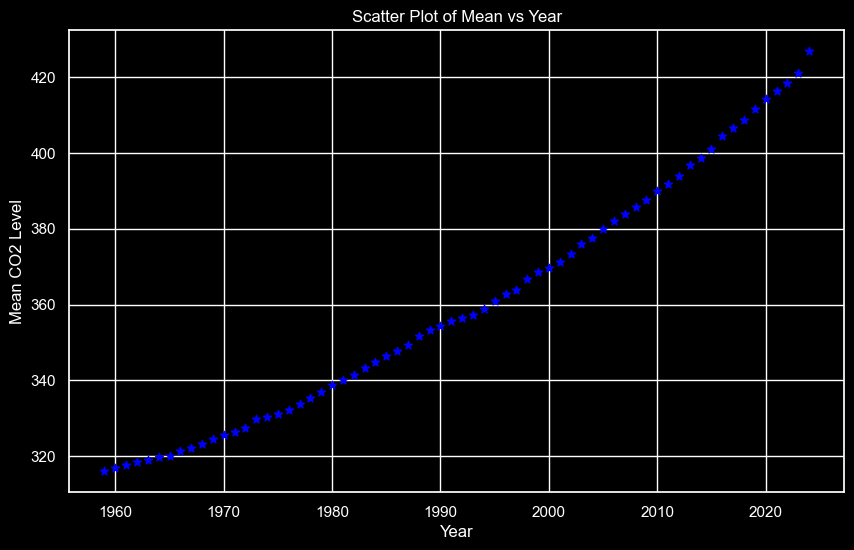

In [308]:
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['mean'], color='blue', marker = '*')

plt.title('Scatter Plot of Mean vs Year')
plt.xlabel('Year')
plt.ylabel('Mean CO2 Level')

In [309]:
X = df['year'].values.reshape(-1, 1)
y = df['mean'].values

In [310]:
X = df['year'].values.reshape(-1, 1)
y = df['mean'].values

poly = PolynomialFeatures(degree = 10)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

In [311]:
r2_score(y, y_pred)

0.999442871954011

In [312]:
y_pred_future = []
X_future = np.array([[x] for x in range(2024, 2036)])
for i in X_future:
    y_pred_future.append(model.predict(poly.fit_transform(np.array([[i]]).reshape(-1, 1))))

y_pred_future

[array([424.48684397]),
 array([427.22048161]),
 array([429.99585003]),
 array([432.8134552]),
 array([435.67380678]),
 array([438.57741816]),
 array([441.52480648]),
 array([444.51649264]),
 array([447.5530013]),
 array([450.63486094]),
 array([453.76260386]),
 array([456.9367662])]

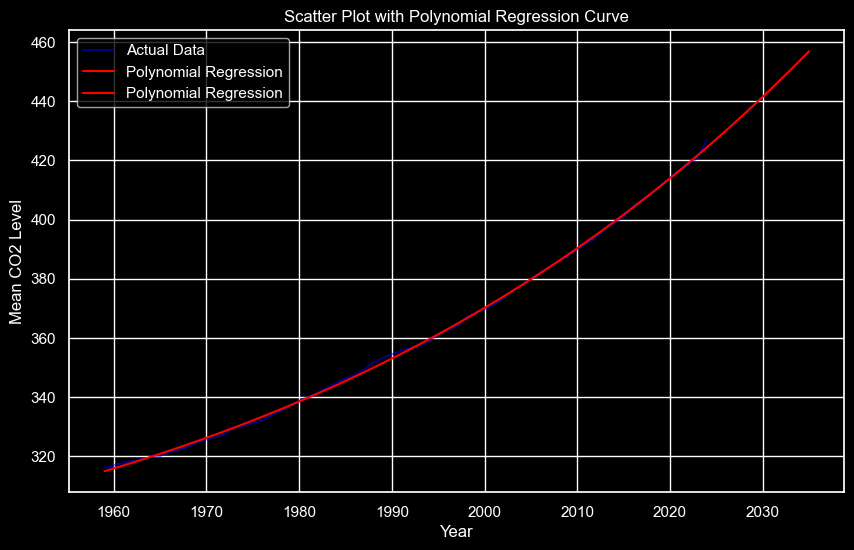

In [313]:
plt.figure(figsize=(10, 6))
plt.plot(df['year'], df['mean'], color='blue', label='Actual Data', alpha = 0.5)

plt.plot(df['year'], y_pred, color='red', label='Polynomial Regression')

plt.plot(X_future, y_pred_future, color='red', label='Polynomial Regression')

plt.title('Scatter Plot with Polynomial Regression Curve')
plt.xlabel('Year')
plt.ylabel('Mean CO2 Level')

plt.legend()
plt.grid(True)

In [85]:
model.predict(poly.fit_transform(np.array([[2024]]).reshape(-1, 1)))

array([424.48684397])

In [82]:
model.predict(poly.fit_transform(np.array([[2024]]).reshape(-1, 1))) #5

array([424.43213276])

KeyError: 'year'

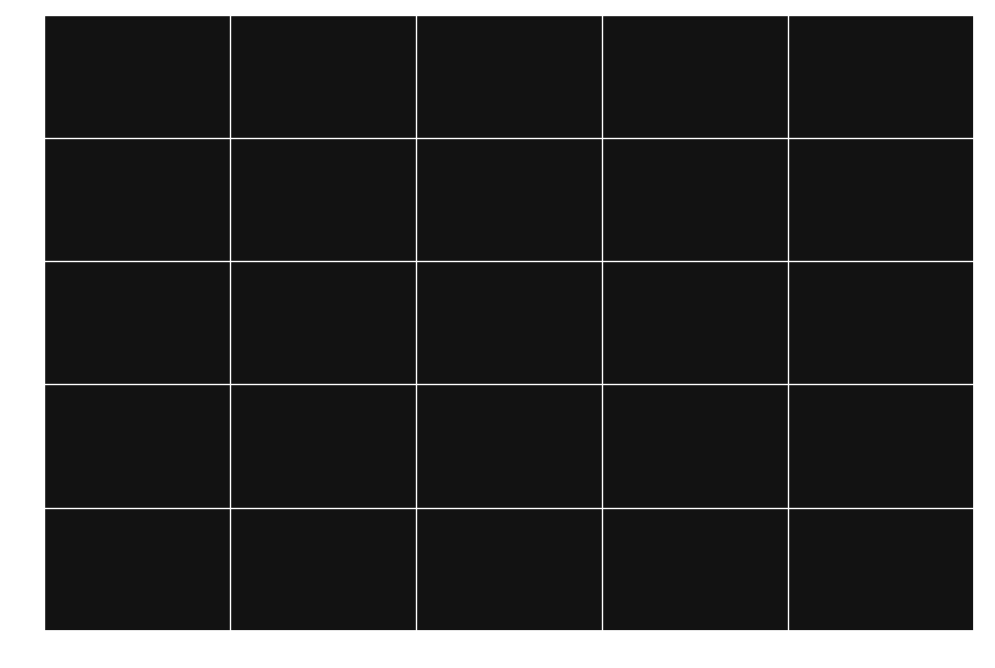

In [333]:
sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))
plt.style.use('dark_background') 
plt.gca().set_facecolor('#121212')

plt.plot(df['year'], df['mean'], color='#CD3E6E', label='Actual Data', alpha=0.5, linewidth=2, marker='o')
plt.plot(df['year'], y_pred, color='#CDDC6E', linewidth=2, linestyle='--')
plt.plot(X_future, y_pred_future, color='#CDDC6E', label='Future Prediction')

plt.title('Mean CO2 Level Over Years', fontsize = 16, fontweight = 'bold', color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Mean CO2 Level (ppm)', fontsize=14, color = 'black')

plt.xticks(fontsize = 13, color ='black')
plt.yticks(fontsize = 12, color = 'black')

plt.legend(fontsize=12, loc='upper left', frameon=True)

for i in range(len(df)):
    if df['year'][i] % 10 == 0:
        plt.annotate(f"{df['mean'][i]:.2f}", 
                     (df['year'][i], df['mean'][i]), 
                     textcoords="offset points", 
                     xytext=(0,10), 
                     ha='center', fontsize=10, color='white')

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.2)
plt.tight_layout() 
plt.show()

# Land Temp

In [328]:
df = pd.read_json('land_temp.json')
df = pd.json_normalize(df['data'])
df

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24
...,...,...,...
139,2019,0.98,0.93
140,2020,1.01,0.95
141,2021,0.85,0.97
142,2022,0.89,0.99


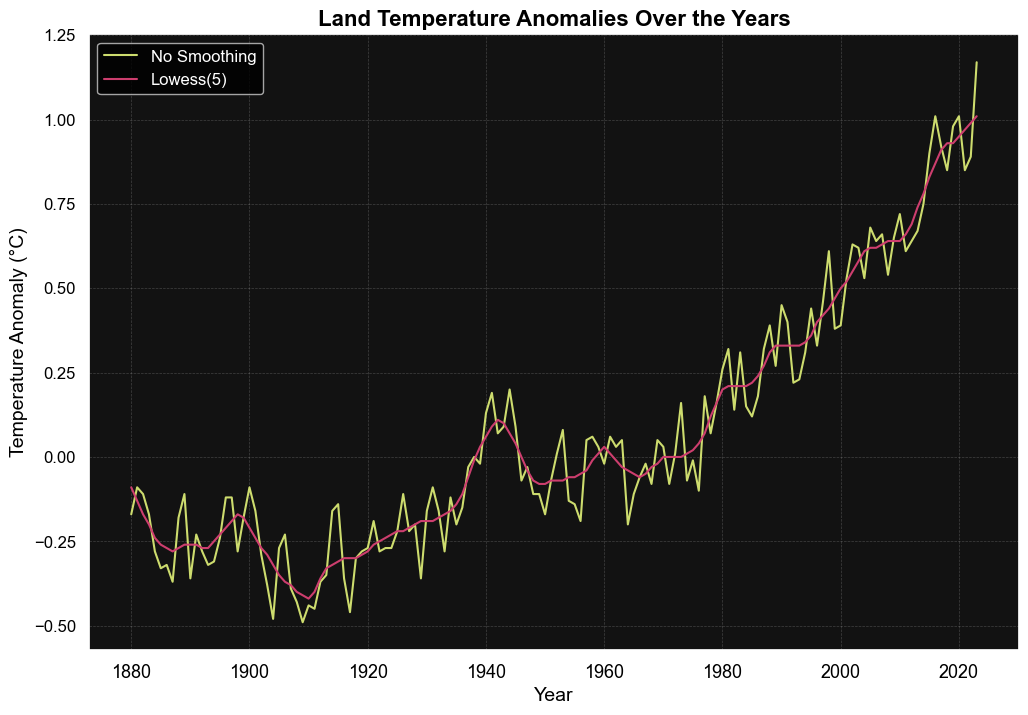

'\nNo_Smoothing:\n\nThis column represents the temperature anomalies (deviations from a baseline average) for each year without any smoothing applied. The values in this column can show fluctuations in temperature, indicating how much the temperature in a given year deviated from the long-term average.\nPositive values indicate that the temperature was higher than the baseline, while negative values indicate that it was lower.\nLowess(5):\n\nLowess (Locally Weighted Scatterplot Smoothing) is a technique used to create a smooth line through a scatterplot. The Lowess(5) in your dataset suggests that a smoothing parameter of 5 has been used.\nThis column represents the smoothed temperature anomalies, providing a clearer view of the overall trend in land temperatures over the years. The smoothing helps to mitigate the effect of short-term fluctuations and highlights long-term trends.\nSummary\nIn summary, this dataset shows how land temperatures have changed from 1880 to 2023, with two dif

In [339]:
sns.set(style='darkgrid')
plt.figure(figsize=(12, 8))
plt.style.use('dark_background') 
plt.gca().set_facecolor('#121212')

plt.plot(df['Year'], df['No_Smoothing'], label='No Smoothing', color='#CDDC6E')
plt.plot(df['Year'], df['Lowess(5)'], label='Lowess(5)', color='#CD3E6E')

plt.title('Land Temperature Anomalies Over the Years', fontsize = 16, fontweight = 'bold', color = 'black')
plt.xlabel('Year', fontsize = 14, color = 'black')
plt.ylabel('Temperature Anomaly (°C)', fontsize = 14, color = 'black')
plt.legend(fontsize=12, loc='upper left', frameon=True)
plt.xticks(fontsize = 13, color ='black')
plt.yticks(fontsize = 12, color = 'black')

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.2)
plt.show()

'''
No_Smoothing:
This column represents the temperature anomalies (deviations from a baseline average) for each year without any smoothing applied. The values in this column can show fluctuations in temperature, indicating how much the temperature in a given year deviated from the long-term average.
Positive values indicate that the temperature was higher than the baseline, while negative values indicate that it was lower.
Lowess(5):

Lowess (Locally Weighted Scatterplot Smoothing) is a technique used to create a smooth line through a scatterplot. The Lowess(5) in your dataset suggests that a smoothing parameter of 5 has been used.
This column represents the smoothed temperature anomalies, providing a clearer view of the overall trend in land temperatures over the years. The smoothing helps to mitigate the effect of short-term fluctuations and highlights long-term trends.
Summary
In summary, this dataset shows how land temperatures have changed from 1880 to 2023, with two different perspectives:

The No_Smoothing column provides the raw temperature anomaly data for each year.
The Lowess(5) column offers a smoothed view of these anomalies, making it easier to identify long-term trends and patterns in temperature changes.
'''

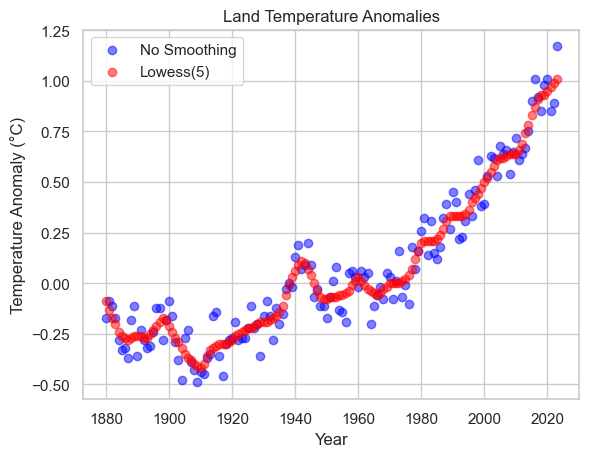

In [138]:
plt.scatter(df['Year'], df['No_Smoothing'], color='blue', label='No Smoothing', alpha=0.5)
plt.scatter(df['Year'], df['Lowess(5)'], color='red', label='Lowess(5)', alpha=0.5)
plt.title('Land Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()

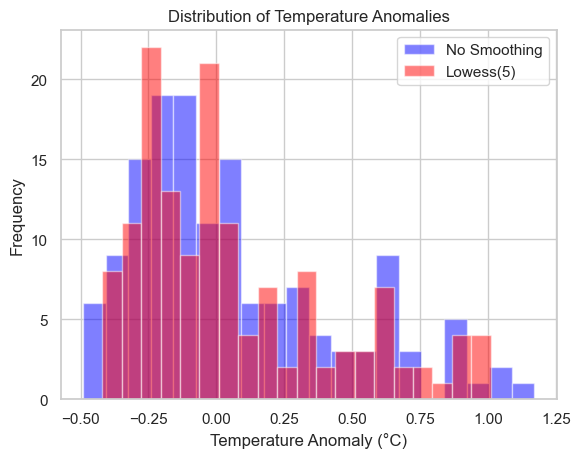

In [139]:
plt.hist(df['No_Smoothing'], bins=20, alpha=0.5, color='blue', label='No Smoothing')
plt.hist(df['Lowess(5)'], bins=20, alpha=0.5, color='red', label='Lowess(5)')
plt.title('Distribution of Temperature Anomalies')
plt.xlabel('Temperature Anomaly (°C)')
plt.ylabel('Frequency')
plt.legend()

In [153]:
X = df['Year'].values.reshape(-1, 1)
y = df['No_Smoothing'].values

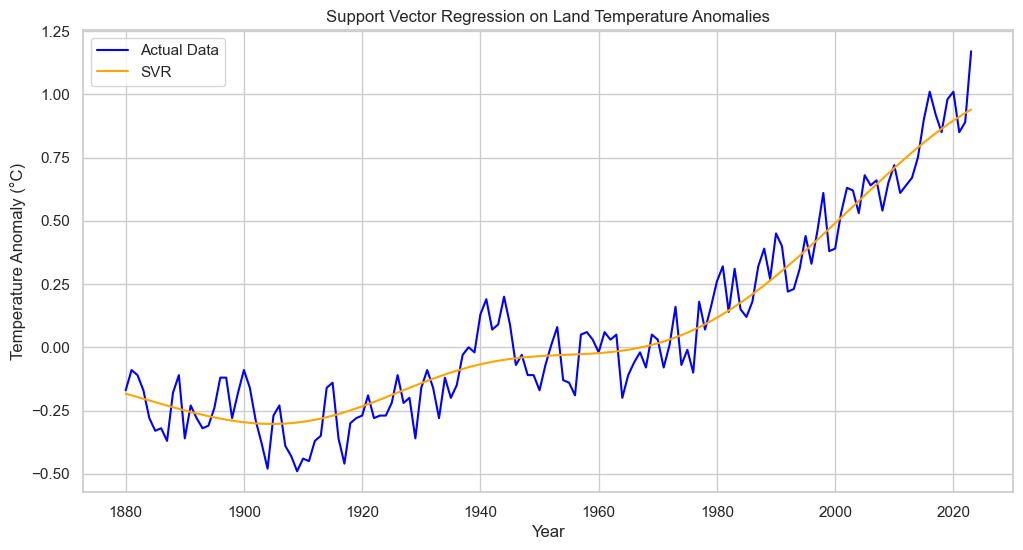

In [149]:
from sklearn.svm import SVR

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X, y)

# Predictions
y_pred_svr = svr_model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['No_Smoothing'], label='Actual Data', color='blue')
plt.plot(df['Year'], y_pred_svr, label='SVR', color='orange')
plt.title('Support Vector Regression on Land Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()


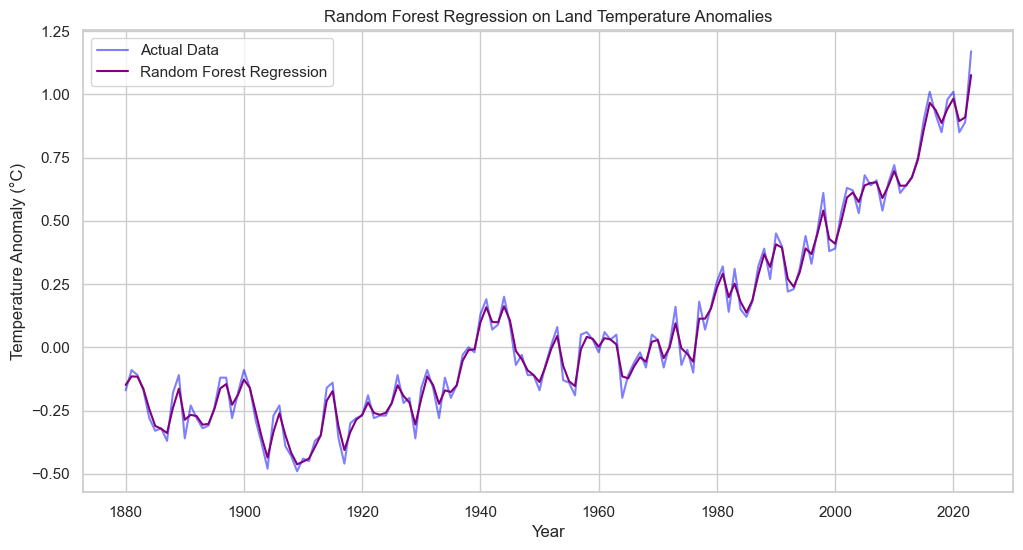

In [158]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

y_pred_rf = rf_model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['No_Smoothing'], label='Actual Data', color='blue', alpha = 0.5)
plt.plot(df['Year'], y_pred_rf, label='Random Forest Regression', color='purple')
plt.title('Random Forest Regression on Land Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()


In [166]:
rf_model.predict([[2025]])

array([1.0759])

In [172]:
y_pred_future = []
X_future = np.array([[x] for x in range(2024, 2036)])
X_future

array([[2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035]])

In [173]:
for i in X_future:
    y_pred_future.append(rf_model.predict([i]))

In [175]:
y_pred_future

[array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759]),
 array([1.0759])]

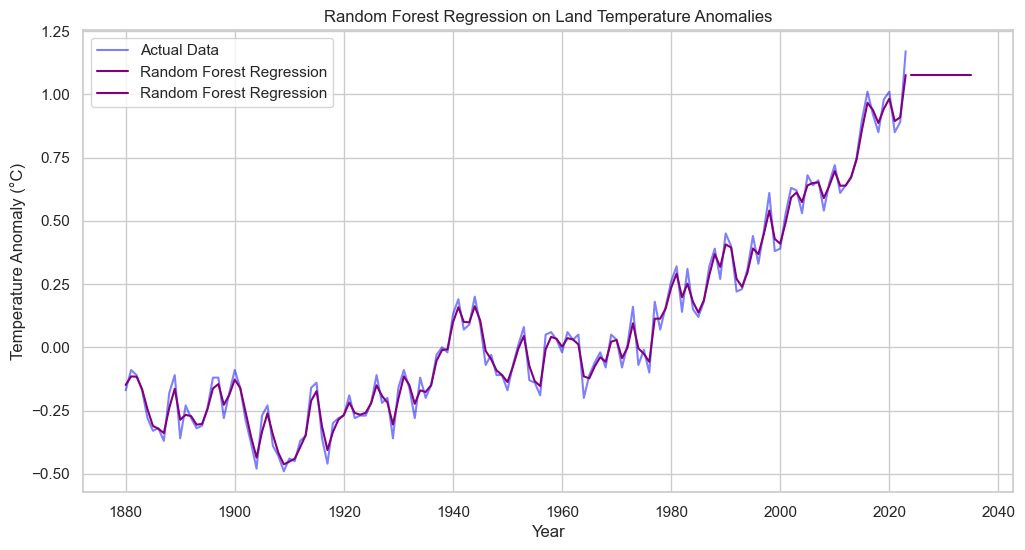

In [174]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

y_pred_rf = rf_model.predict(X)

plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['No_Smoothing'], label='Actual Data', color='blue', alpha = 0.5)
plt.plot(df['Year'], y_pred_rf, label='Random Forest Regression', color='purple')
plt.plot(X_future, y_pred_future, label='Random Forest Regression', color='purple')
plt.title('Random Forest Regression on Land Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()


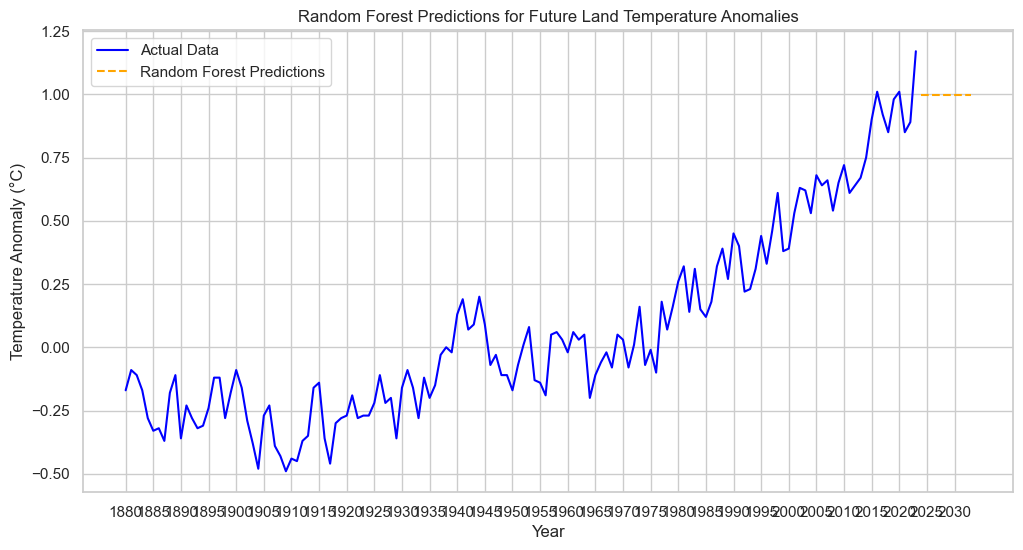

Predicted temperature anomaly for 2024: 1.00 °C
Predicted temperature anomaly for 2025: 1.00 °C
Predicted temperature anomaly for 2026: 1.00 °C
Predicted temperature anomaly for 2027: 1.00 °C
Predicted temperature anomaly for 2028: 1.00 °C
Predicted temperature anomaly for 2029: 1.00 °C
Predicted temperature anomaly for 2030: 1.00 °C
Predicted temperature anomaly for 2031: 1.00 °C
Predicted temperature anomaly for 2032: 1.00 °C
Predicted temperature anomaly for 2033: 1.00 °C


In [180]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')

# Prepare the data
X = df['Year'].values.reshape(-1, 1)  # Features
y = df['Lowess(5)'].values           # Target

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # You can experiment with the degree
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prepare future years for prediction
future_years = np.array(range(2024, 2034)).reshape(-1, 1)
future_years_poly = poly.transform(future_years)  # Transform the future years

# Make predictions for the future years
y_pred_future = rf_model.predict(future_years_poly)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['No_Smoothing'], label='Actual Data', color='blue')
plt.plot(future_years, y_pred_future, label='Random Forest Predictions', color='orange', linestyle='--')
plt.title('Random Forest Predictions for Future Land Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(np.arange(1880, 2035, 5))
plt.legend()
plt.grid(True)
plt.show()

# Print the predicted future values
for year, pred in zip(range(2024, 2034), y_pred_future):
    print(f"Predicted temperature anomaly for {year}: {pred:.2f} °C")


# Global Gender Gap Index

In [183]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   --------------------------------- ------ 81.9/96.5 kB 762.6 kB/s eta 0:00:01
   ---------------------------------------- 96.5/96.5 kB 784.5 kB/s eta 0:00:00


In [340]:
df = pd.read_excel("global-gender-gap-index-2013-xlsx-4.xlsx", sheet_name = "Table 3a - Index 2013 - 2006")
df

,Country,ISO3,2013 Rank,2013 Score,2012 Countries,2012 Rank,2012 Score,2011 Rank,2011 Score,2010 Rank,2010 Score,2009 Rank,2009 Score,2008 Rank,2008 Score,2007 Rank,2007 Score,2006 Rank,2006 Score
0,Iceland,ISL,1,0.8731,1.0,1.0,0.8640,1.0,0.8530,1.0,0.8496,1.0,0.8276,4.0,0.7999,4.0,0.7836,4.0,0.7813
1,Finland,FIN,2,0.8421,2.0,2.0,0.8451,3.0,0.8383,3.0,0.8260,2.0,0.8252,2.0,0.8195,3.0,0.8044,3.0,0.7958
2,Norway,NOR,3,0.8417,3.0,3.0,0.8403,2.0,0.8404,2.0,0.8404,3.0,0.8227,1.0,0.8239,2.0,0.8059,2.0,0.7994
3,Sweden,SWE,4,0.8129,4.0,4.0,0.8159,4.0,0.8044,4.0,0.8024,4.0,0.8139,3.0,0.8139,1.0,0.8146,1.0,0.8133
4,Philippines,PHL,5,0.7832,5.0,8.0,0.7757,8.0,0.7685,9.0,0.7654,9.0,0.7579,6.0,0.7568,6.0,0.7629,6.0,0.7516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Mauritania,MRT,132,0.5810,129.0,119.0,0.6129,114.0,0.6164,113.0,0.6152,119.0,0.6103,110.0,0.6117,111.0,0.6022,106.0,0.5835
132,Syria,SYR,133,0.5661,130.0,132.0,0.5626,124.0,0.5896,124.0,0.5926,121.0,0.6072,107.0,0.6181,103.0,0.6216,NaN,NaN
133,Chad,TCD,134,0.5588,131.0,133.0,0.5594,134.0,0.5334,133.0,0.5330,133.0,0.5417,129.0,0.5290,127.0,0.5381,113.0,0.5247
134,Pakistan,PAK,135,0.5459,132.0,134.0,0.5478,133.0,0.5583,132.0,0.5465,132.0,0.5458,127.0,0.5549,126.0,0.5509,112.0,0.5434


In [341]:
df.drop(['2012 Countries'], axis = 1, inplace = True)

In [342]:
df

,Country,ISO3,2013 Rank,2013 Score,2012 Rank,2012 Score,2011 Rank,2011 Score,2010 Rank,2010 Score,2009 Rank,2009 Score,2008 Rank,2008 Score,2007 Rank,2007 Score,2006 Rank,2006 Score
0,Iceland,ISL,1,0.8731,1.0,0.8640,1.0,0.8530,1.0,0.8496,1.0,0.8276,4.0,0.7999,4.0,0.7836,4.0,0.7813
1,Finland,FIN,2,0.8421,2.0,0.8451,3.0,0.8383,3.0,0.8260,2.0,0.8252,2.0,0.8195,3.0,0.8044,3.0,0.7958
2,Norway,NOR,3,0.8417,3.0,0.8403,2.0,0.8404,2.0,0.8404,3.0,0.8227,1.0,0.8239,2.0,0.8059,2.0,0.7994
3,Sweden,SWE,4,0.8129,4.0,0.8159,4.0,0.8044,4.0,0.8024,4.0,0.8139,3.0,0.8139,1.0,0.8146,1.0,0.8133
4,Philippines,PHL,5,0.7832,8.0,0.7757,8.0,0.7685,9.0,0.7654,9.0,0.7579,6.0,0.7568,6.0,0.7629,6.0,0.7516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Mauritania,MRT,132,0.5810,119.0,0.6129,114.0,0.6164,113.0,0.6152,119.0,0.6103,110.0,0.6117,111.0,0.6022,106.0,0.5835
132,Syria,SYR,133,0.5661,132.0,0.5626,124.0,0.5896,124.0,0.5926,121.0,0.6072,107.0,0.6181,103.0,0.6216,NaN,NaN
133,Chad,TCD,134,0.5588,133.0,0.5594,134.0,0.5334,133.0,0.5330,133.0,0.5417,129.0,0.5290,127.0,0.5381,113.0,0.5247
134,Pakistan,PAK,135,0.5459,134.0,0.5478,133.0,0.5583,132.0,0.5465,132.0,0.5458,127.0,0.5549,126.0,0.5509,112.0,0.5434


In [343]:
col = df.columns
col

Index(['Country', 'ISO3', '2013 Rank', '2013 Score', '2012 Rank', '2012 Score',
       '2011 Rank', '2011 Score', '2010 Rank', '2010 Score', '2009 Rank',
       '2009 Score', '2008 Rank', '2008 Score', '2007 Rank', '2007 Score',
       '2006 Rank', '2006 Score'],
      dtype='object')

In [344]:
rank_columns = df.filter(like='Rank').columns
rank_columns

Index(['2013 Rank', '2012 Rank', '2011 Rank', '2010 Rank', '2009 Rank',
       '2008 Rank', '2007 Rank', '2006 Rank'],
      dtype='object')

In [345]:
rank_columns = list(rank_columns)  # Convert to list if not already
rank_columns.reverse()  # Reverse the list in place
df_rank = df[['Country', 'ISO3'] + rank_columns]
df_rank

,Country,ISO3,2006 Rank,2007 Rank,2008 Rank,2009 Rank,2010 Rank,2011 Rank,2012 Rank,2013 Rank
0,Iceland,ISL,4.0,4.0,4.0,1.0,1.0,1.0,1.0,1
1,Finland,FIN,3.0,3.0,2.0,2.0,3.0,3.0,2.0,2
2,Norway,NOR,2.0,2.0,1.0,3.0,2.0,2.0,3.0,3
3,Sweden,SWE,1.0,1.0,3.0,4.0,4.0,4.0,4.0,4
4,Philippines,PHL,6.0,6.0,6.0,9.0,9.0,8.0,8.0,5
...,...,...,...,...,...,...,...,...,...,...
131,Mauritania,MRT,106.0,111.0,110.0,119.0,113.0,114.0,119.0,132
132,Syria,SYR,NaN,103.0,107.0,121.0,124.0,124.0,132.0,133
133,Chad,TCD,113.0,127.0,129.0,133.0,133.0,134.0,133.0,134
134,Pakistan,PAK,112.0,126.0,127.0,132.0,132.0,133.0,134.0,135


In [346]:
score_columns = df.filter(like='Score').columns
score_columns

Index(['2013 Score', '2012 Score', '2011 Score', '2010 Score', '2009 Score',
       '2008 Score', '2007 Score', '2006 Score'],
      dtype='object')

In [347]:
score_columns = list(score_columns)  # Convert to list if not already
score_columns.reverse()  # Reverse the list in place
df_score = df[['Country', 'ISO3'] + score_columns]
df_score

,Country,ISO3,2006 Score,2007 Score,2008 Score,2009 Score,2010 Score,2011 Score,2012 Score,2013 Score
0,Iceland,ISL,0.7813,0.7836,0.7999,0.8276,0.8496,0.8530,0.8640,0.8731
1,Finland,FIN,0.7958,0.8044,0.8195,0.8252,0.8260,0.8383,0.8451,0.8421
2,Norway,NOR,0.7994,0.8059,0.8239,0.8227,0.8404,0.8404,0.8403,0.8417
3,Sweden,SWE,0.8133,0.8146,0.8139,0.8139,0.8024,0.8044,0.8159,0.8129
4,Philippines,PHL,0.7516,0.7629,0.7568,0.7579,0.7654,0.7685,0.7757,0.7832
...,...,...,...,...,...,...,...,...,...,...
131,Mauritania,MRT,0.5835,0.6022,0.6117,0.6103,0.6152,0.6164,0.6129,0.5810
132,Syria,SYR,NaN,0.6216,0.6181,0.6072,0.5926,0.5896,0.5626,0.5661
133,Chad,TCD,0.5247,0.5381,0.5290,0.5417,0.5330,0.5334,0.5594,0.5588
134,Pakistan,PAK,0.5434,0.5509,0.5549,0.5458,0.5465,0.5583,0.5478,0.5459


In [348]:
X = [x for x in range(2006, 2014)]

In [377]:
name = 'United States'
'''
Yemen
Pakistan
Chad
Syria
India
Iceland
Finland
United States
'''

'\nYemen\nPakistan\nChad\nSyria\nIndia\nIceland\nFinland\nUnited States\n'

In [378]:
y = df.loc[df['Country'] == name, score_columns].values.reshape(1, -1)

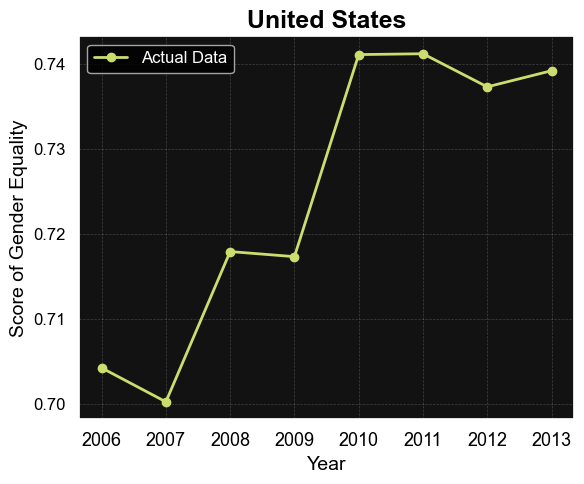

In [379]:
sns.set(style='darkgrid')
plt.figure(figsize=(6, 5))
plt.style.use('dark_background') 
plt.gca().set_facecolor('#121212')
plt.plot(X, y.ravel(), color='#CDDC6E', label='Actual Data', linewidth=2, marker='o')

plt.title(name, fontsize=18, fontweight='bold', color='black')
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Score of Gender Equality', fontsize=14, color='black')

# Set tick parameters with adjusted colors
plt.xticks(fontsize=13, color='black')
plt.yticks(fontsize=12, color='black')

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 12)

plt.legend(fontsize=12, loc='upper left', frameon=True)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.2)
plt.tight_layout() 

Text(0.5, 1.0, 'Iceland')

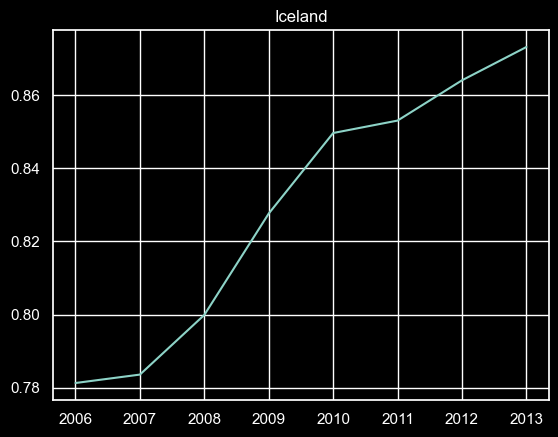

In [296]:
plt.plot(X, y.ravel())
plt.title(name)

In [382]:
df_ranking = pd.read_excel("global-gender-gap-index-2013-xlsx-4.xlsx", sheet_name = "Table 3b - Detailed rankings")
df_ranking

,Country,ISO3,Overall Rank,Overall Score,Economic Participation and Opportunity Rank,Economic Participation and Opportunity Score,Educational Attainment Rank,Educational Attainment Score,Health and Survival Rank,Health and Survival Score,Political Empowerment Rank,Political Empowerment Score
0,Iceland,ISL,1,0.8731,22,0.7684,1,1.0000,97,0.9696,1,0.7544
1,Finland,FIN,2,0.8421,19,0.7727,1,1.0000,1,0.9796,2,0.6162
2,Norway,NOR,3,0.8417,1,0.8357,1,1.0000,93,0.9697,3,0.5616
3,Sweden,SWE,4,0.8129,14,0.7829,38,0.9977,69,0.9735,4,0.4976
4,Philippines,PHL,5,0.7832,16,0.7773,1,1.0000,1,0.9796,10,0.3760
...,...,...,...,...,...,...,...,...,...,...,...,...
131,Mauritania,MRT,132,0.5810,131,0.3651,119,0.8591,1,0.9796,82,0.1201
132,Syria,SYR,133,0.5661,136,0.2508,96,0.9682,58,0.9756,112,0.0697
133,Chad,TCD,134,0.5588,75,0.6547,135,0.5311,112,0.9612,102,0.0883
134,Pakistan,PAK,135,0.5459,135,0.3108,129,0.7685,124,0.9557,64,0.1487


In [383]:
name = ['United States', 'Yemen', 'Pakistan', 'Chad', 'Syria', 'India', 'Iceland', 'Finland', 'United States']

In [392]:
filter_df = df_ranking[df_ranking['Country'].isin(name)]

# Select the desired columns
# This line will select 'Country', 'ISO3', and any columns containing 'Rank'
filter_df = filter_df[['Country', 'ISO3'] + list(filter_df.filter(like='Rank').columns)]
filter_df

,Country,ISO3,Overall Rank,Economic Participation and Opportunity Rank,Educational Attainment Rank,Health and Survival Rank,Political Empowerment Rank
0,Iceland,ISL,1,22,1,97,1
1,Finland,FIN,2,19,1,1,2
22,United States,USA,23,6,1,33,60
100,India,IND,101,124,120,135,9
132,Syria,SYR,133,136,96,58,112
133,Chad,TCD,134,75,135,112,102
134,Pakistan,PAK,135,135,129,124,64
135,Yemen,YEM,136,132,134,81,131


In [484]:
file_path = 'data.json'
filter_df.to_json(file_path, orient='records', lines=False)

In [273]:
df_ranking[df_ranking['Country'] == name].filter(like='Rank')

,Overall Rank,Economic Participation and Opportunity Rank,Educational Attainment Rank,Health and Survival Rank,Political Empowerment Rank
0,1,22,1,97,1


# Gender Inequality Index

In [395]:
df_new = pd.read_csv('output.csv')
df_new

,Country,2012 - 2013,2011 - 2012,2010 - 2011,2009 - 2010,2008 - 2009,2007 - 2008,2006 - 2007,overall
0,Iceland,0.0091,0.0110,0.0034,0.0220,0.0277,0.0164,0.0023,0.0918
1,Finland,-0.0030,0.0068,0.0123,0.0008,0.0057,0.0151,0.0086,0.0463
2,Norway,0.0014,0.0000,0.0000,0.0177,-0.0011,0.0180,0.0065,0.0423
3,Sweden,-0.0030,0.0115,0.0020,-0.0116,0.0000,-0.0007,0.0014,-0.0004
4,Philippines,0.0075,0.0072,0.0031,0.0076,0.0011,-0.0061,0.0113,0.0316
...,...,...,...,...,...,...,...,...,...
105,"Iran, Islamic Rep.",-0.0085,0.0033,-0.0039,0.0094,-0.0182,0.0117,0.0101,0.0039
106,Mauritania,-0.0319,-0.0035,0.0011,0.0050,-0.0014,0.0095,0.0187,-0.0025
107,Chad,-0.0006,0.0260,0.0004,-0.0087,0.0126,-0.0091,0.0134,0.0341
108,Pakistan,-0.0019,-0.0105,0.0118,0.0007,-0.0090,0.0040,0.0075,0.0026


In [459]:
X = [x for x in range(2006, 2013)]

In [479]:
name = 'United States'
'''
Yemen
Pakistan
Chad
India
Iceland
Finland
United States
'''

'\nYemen\nPakistan\nChad\nIndia\nIceland\nFinland\nUnited States\n'

In [480]:
y = df_new.loc[df_new['Country'] == name].values.reshape(1, -1)
y = y[:, 1 : 8]
y[0] = y[0][::-1]
y

array([[-0.0039, 0.0177, -0.0006, 0.0238, 0.0001, -0.0039, 0.002]],
      dtype=object)

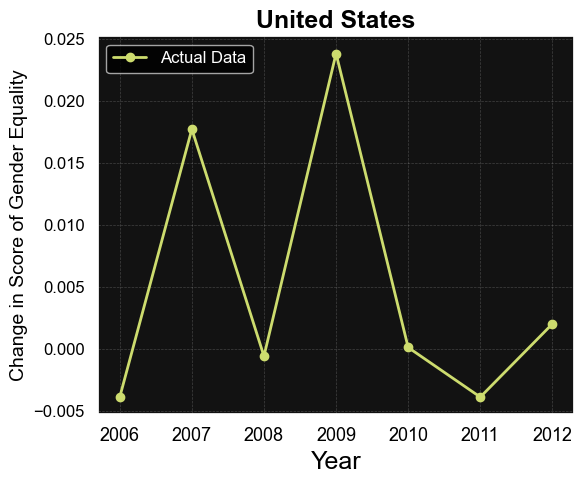

In [481]:
sns.set(style='darkgrid')
plt.figure(figsize=(6, 5))
plt.style.use('dark_background') 
plt.gca().set_facecolor('#121212')
plt.plot(X, y.ravel(), color='#CDDC6E', label='Actual Data', linewidth=2, marker='o')

plt.title(name, fontsize=18, fontweight='bold', color='black')
plt.xlabel('Year', fontsize=18, color='black')
plt.ylabel('Change in Score of Gender Equality', fontsize=14, color='black')

plt.xticks(fontsize=13, color='black')
plt.yticks(fontsize=12, color='black')

plt.legend(fontsize=12, loc='upper left', frameon=True)

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.2)
plt.tight_layout() 